In [7]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
torch.manual_seed(1)    # reproducible


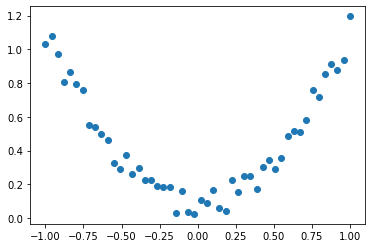

tensor([[-1.0000],
        [-0.9592],
        [-0.9184],
        [-0.8776],
        [-0.8367],
        [-0.7959],
        [-0.7551],
        [-0.7143],
        [-0.6735],
        [-0.6327],
        [-0.5918],
        [-0.5510],
        [-0.5102],
        [-0.4694],
        [-0.4286],
        [-0.3878],
        [-0.3469],
        [-0.3061],
        [-0.2653],
        [-0.2245],
        [-0.1837],
        [-0.1429],
        [-0.1020],
        [-0.0612],
        [-0.0204],
        [ 0.0204],
        [ 0.0612],
        [ 0.1020],
        [ 0.1429],
        [ 0.1837],
        [ 0.2245],
        [ 0.2653],
        [ 0.3061],
        [ 0.3469],
        [ 0.3878],
        [ 0.4286],
        [ 0.4694],
        [ 0.5102],
        [ 0.5510],
        [ 0.5918],
        [ 0.6327],
        [ 0.6735],
        [ 0.7143],
        [ 0.7551],
        [ 0.7959],
        [ 0.8367],
        [ 0.8776],
        [ 0.9184],
        [ 0.9592],
        [ 1.0000]])
tensor([[1.0333],
        [1.0809],
        [0.97

In [19]:
x = torch.unsqueeze(torch.linspace(-1, 1, 50), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

print(x)
print(y)

In [10]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [11]:
net = Net(n_feature=1, n_hidden=2, n_output=1)     # define the network
print(net)  # net architecture
print(net.parameters)

Net(
  (hidden): Linear(in_features=1, out_features=2, bias=True)
  (predict): Linear(in_features=2, out_features=1, bias=True)
)
<bound method Module.parameters of Net(
  (hidden): Linear(in_features=1, out_features=2, bias=True)
  (predict): Linear(in_features=2, out_features=1, bias=True)
)>


In [13]:
for name, p in net.named_parameters():
    print(name, p.data) # before trraining 

hidden.weight tensor([[-0.9614],
        [-0.4768]])
hidden.bias tensor([ 0.5426, -0.2431])
predict.weight tensor([[0.7043, 0.5668]])
predict.bias tensor([-0.0331])


In [14]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [15]:
plt.ion()   # something about plotting


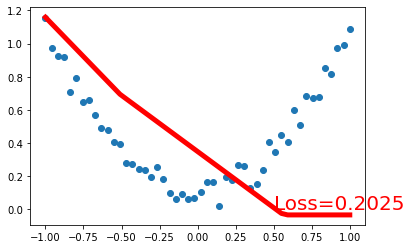

tensor(0.2025, grad_fn=<MseLossBackward0>)


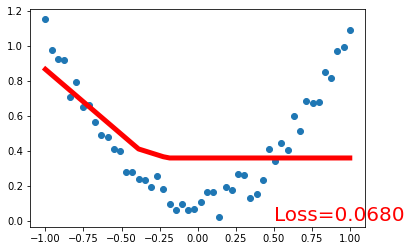

tensor(0.0680, grad_fn=<MseLossBackward0>)


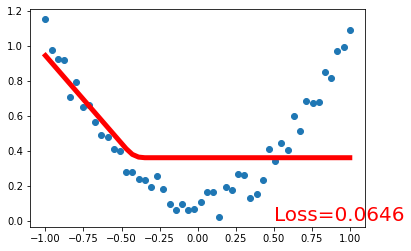

tensor(0.0646, grad_fn=<MseLossBackward0>)


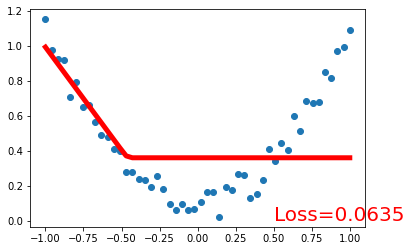

tensor(0.0635, grad_fn=<MseLossBackward0>)


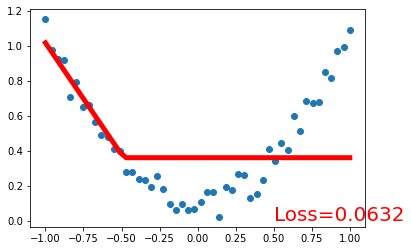

tensor(0.0632, grad_fn=<MseLossBackward0>)


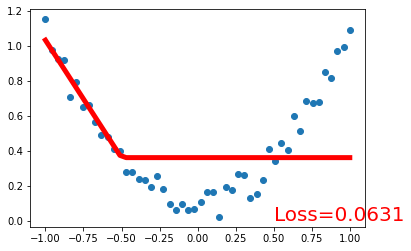

tensor(0.0631, grad_fn=<MseLossBackward0>)


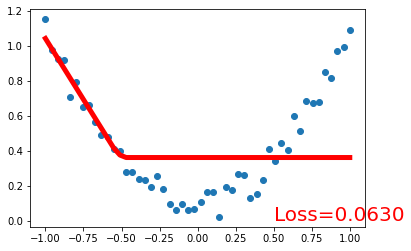

tensor(0.0630, grad_fn=<MseLossBackward0>)


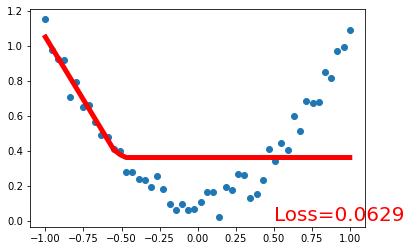

tensor(0.0629, grad_fn=<MseLossBackward0>)


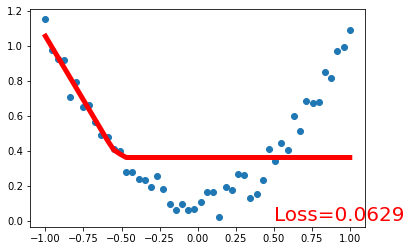

tensor(0.0629, grad_fn=<MseLossBackward0>)


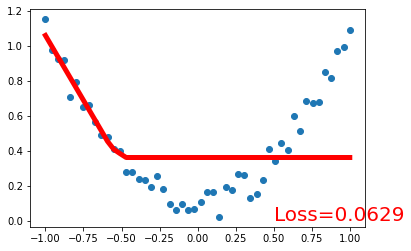

tensor(0.0629, grad_fn=<MseLossBackward0>)


In [16]:
for t in range(1000):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    

    if t % 100 == 0:
        # # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)
        print(loss)

plt.ioff()

In [17]:
pred = net(torch.tensor([-1.0000]))
print(pred)

tensor([1.0621], grad_fn=<AddBackward0>)


In [18]:
for parameters, p in net.named_parameters():
    print(parameters, p.data) # after trraining 

hidden.weight tensor([[-0.9549],
        [-0.8767]])
hidden.bias tensor([-0.4485, -0.5036])
predict.weight tensor([[0.6254, 1.0278]])
predict.bias tensor([0.3620])


In [20]:
pred = net(torch.tensor([-1.0000]))
print(pred)

tensor([1.0621], grad_fn=<AddBackward0>)
